# Communicate Data Findings for Ford GoBike System Data
## by (Dhruv Tewari)

## About Data

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 

This data can also be downloded from :https://www.lyft.com/bikes/bay-wheels/system-data

The data is from January 2017 -  March 2020

Each trip is anonymized and includes:

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

###  Import all packages to download all the files

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import glob
import os
import zipfile
import requests
import warnings
warnings.filterwarnings("ignore") 

In [10]:
# This is to enlarge the width of the Juypter notebook for better visual experience
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:80% !important;}</style>"))
# Making the visual more clear and increase the default size of any plot
matplotlib.rcParams['figure.figsize'] = (13,8)
matplotlib.rcParams['lines.linewidth'] = 2

%config InlineBackend.figure_format = 'retina'# for high resolution of the plots

In [10]:
# Creating a variable for storing the list of all the months file from 2018-2020

year_data1 = [x for x in range(201801, 201813)] + [x for x in range(201901, 201905)]
for year1 in year_data1:
    # link to download the data files from Jan 2018- Apr 2019
    url1= f"https://s3.amazonaws.com/baywheels-data/{year1}-fordgobike-tripdata.csv.zip" 
    response= requests.get(url1)
     #save file
    with open(f"{year1}-fordgobike-tripdata.csv.zip", mode = "wb") as file:
        file.write(response.content)

year_data2 =[x for x in range(201905, 201913)] + [x for x in range(202001, 202004)]
for year2 in year_data2:
    # link to download the data files from May 2019- Mar 2020
    url2= f"https://s3.amazonaws.com/baywheels-data/{year2}-baywheels-tripdata.csv.zip" # link to download the data files
    response= requests.get(url2)
     #save file
    with open(f"{year2}-baywheels-tripdata.csv.zip", mode = "wb") as file:
        file.write(response.content)

In [11]:
all_data = []
for f in glob.glob("./Data/*.csv"):
    all_data.append(pd.read_csv(f))
Final_df = pd.concat(all_data, ignore_index=True)
Final_df.to_csv("Final_Dataset.csv")

In [25]:
Final_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,NaN
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,NaN
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No,NaN
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No,NaN
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No,NaN


In [26]:
## Creating a function to do primary data analysis
def primary_analysis(df):
    data_shape = df.shape;
    print("**The dataset has {} rows and {} columns.**".format(data_shape[0],data_shape[1]))
    data_dup=df.duplicated().sum();
    print("\n**The dataset has {} duplicate rows.**".format(data_dup))
    data_missing= df.isna().sum();
    print("\n**The count of missing values in all variables:**\n \n{}.".format(data_missing))
    data_dtypes= df.dtypes;
    print("\n**The information about the dtypes of the variables:**\n \n{}.".format(data_dtypes))
    return primary_analysis

In [27]:
primary_analysis(Final_df);

**The dataset has 5275711 rows and 15 columns.**

**The dataset has 7512 duplicate rows.**

**The count of missing values in all variables:**
 
duration_sec                     0
start_time                       0
end_time                         0
start_station_id            578807
start_station_name          576973
start_station_latitude           0
start_station_longitude          0
end_station_id              580455
end_station_name            578629
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip    1148266
rental_access_method       4537015
dtype: int64.

**The information about the dtypes of the variables:**
 
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id

The above function give us the general ideas of the dataset. It has some duplicates, some missing values and some data types which we need to take care of

In [28]:
#Change the datatype of the variable start_time and end_time to date type
Final_df['start_time'] = pd.to_datetime(Final_df['start_time'])
Final_df['end_time'] = pd.to_datetime(Final_df['end_time'])

In [29]:
# Removing the duplicates from the data 
Final_df.drop_duplicates(inplace=True)

In [30]:
# Replacing the null value of 'bike_share_for_all_trip' and 'rental_access_method' with the mode of the field
Final_df['bike_share_for_all_trip']=Final_df['bike_share_for_all_trip'].fillna(Final_df['bike_share_for_all_trip'].mode().iloc[0])
Final_df['rental_access_method']=Final_df['rental_access_method'].fillna(Final_df['rental_access_method'].mode().iloc[0])

In [31]:
Final_df.isna().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id           572441
start_station_name         570607
start_station_latitude          0
start_station_longitude         0
end_station_id             574096
end_station_name           572270
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
bike_share_for_all_trip         0
rental_access_method            0
dtype: int64

In [32]:
#dropping the rows with missing values
Final_df.dropna(how='any',axis=0,inplace=True)

In [33]:
Final_df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
bike_share_for_all_trip    0
rental_access_method       0
dtype: int64

## Feature Engineering 

In [34]:
# Creating additional columns of start_month and weekday for analysis purpose
Final_df['start_month'] = Final_df['start_time'].dt.strftime('%m')
Final_df['weekday']     = Final_df['start_time'].dt.strftime('%a')
Final_df['start_hour']  = Final_df['start_time'].dt.strftime('%H')
# Creating a variable for duration in minutes
Final_df['duration_mins']=Final_df['duration_sec']/60

## Univariate Exploration

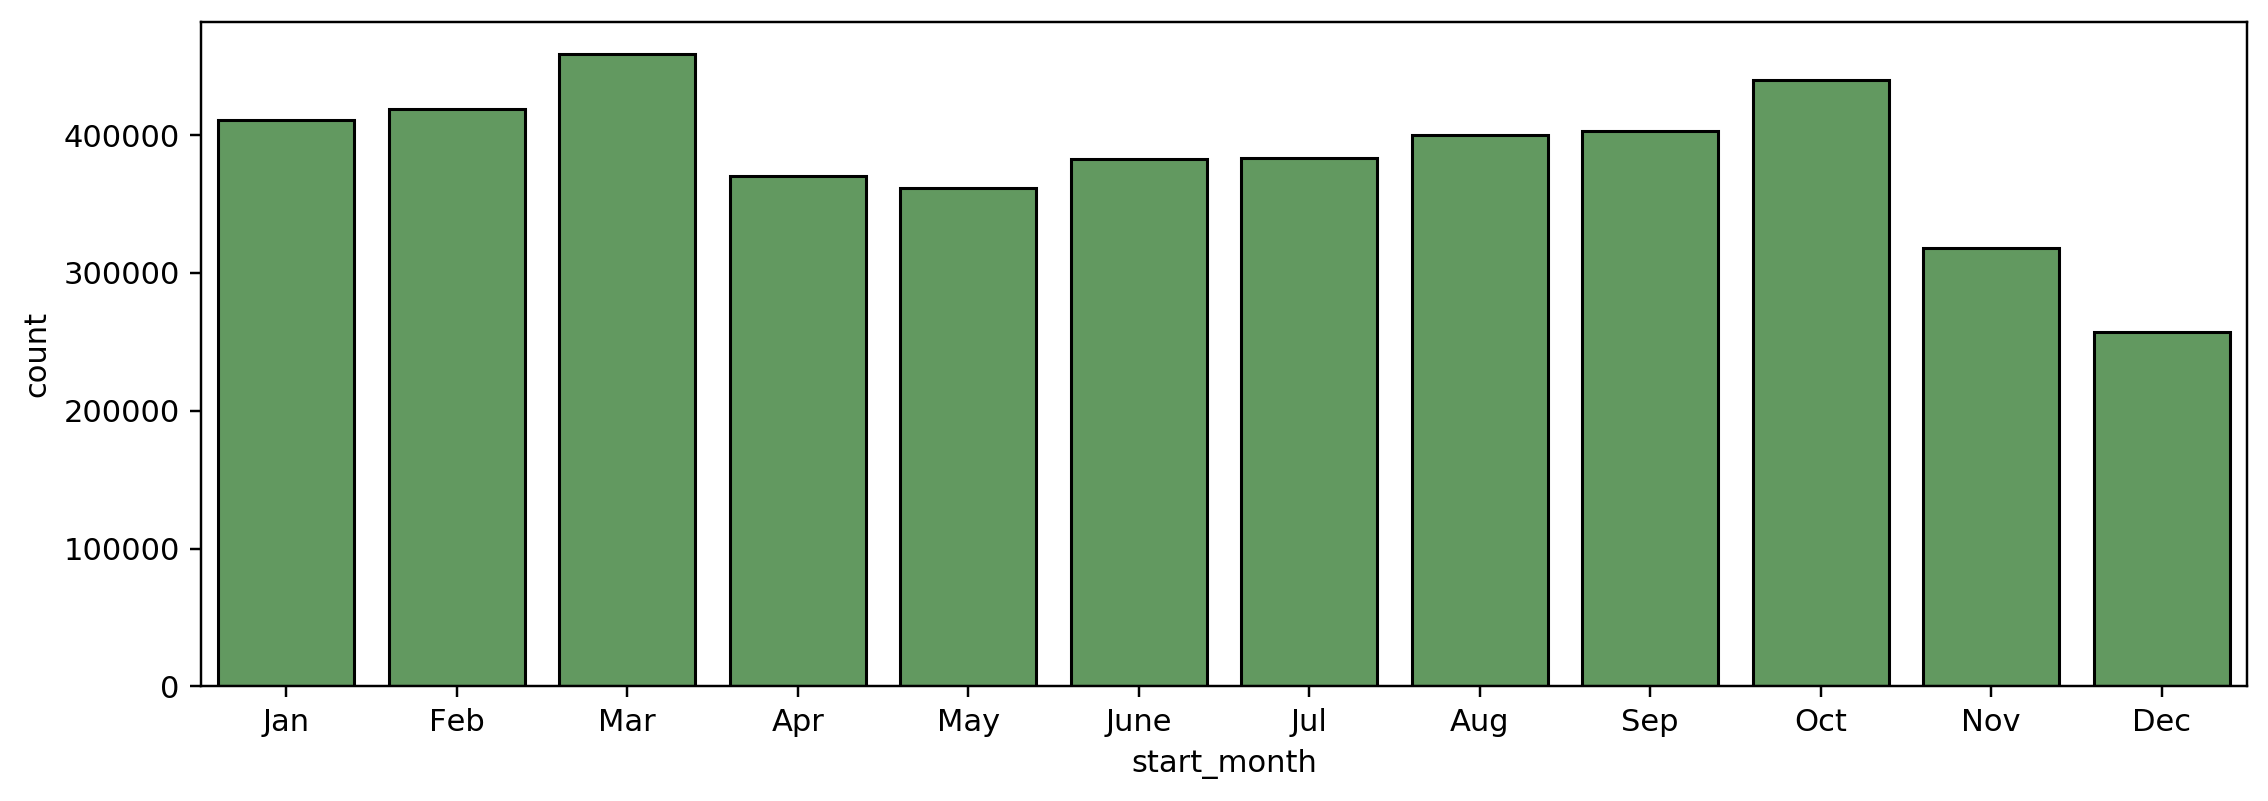

In [36]:
fig, ax = plt.subplots(figsize = (12,4), dpi = 110)
sns.countplot(data= Final_df,x='start_month',color= sns.color_palette()[2],edgecolor = "black");
ax.set(xticklabels=["Jan", "Feb", "Mar", "Apr", "May", "June", "Jul","Aug","Sep","Oct","Nov","Dec"]);

The above plot shows us the during the period of Jan,2018 - Mar,2020 which months have highest number of bike sharing. From the analysis it shows the *March* and *October* has the highest number of bike sharing

Subscriber    3576322
Customer      1027962
Name: user_type, dtype: int64

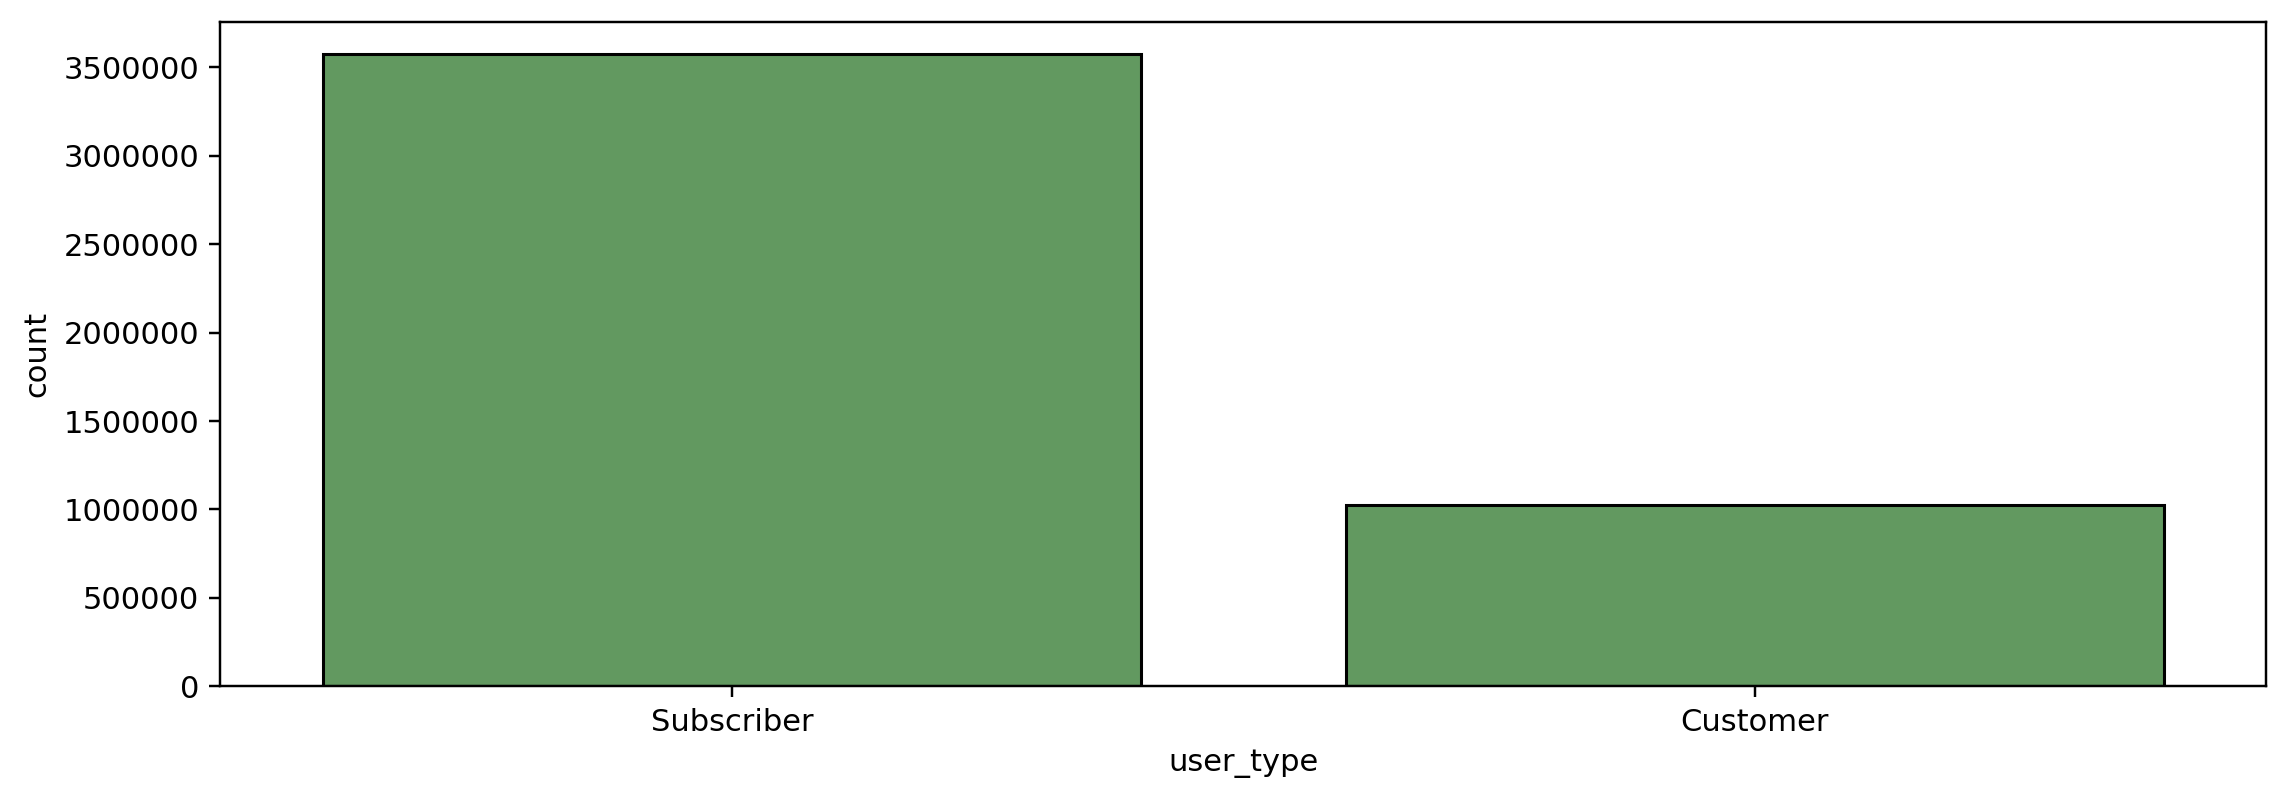

In [129]:
fig, ax = plt.subplots(figsize = (12,4), dpi = 110)
sns.countplot(data= Final_df,x='user_type',color= sns.color_palette()[2],edgecolor = "black");
Final_df['user_type'].value_counts()

The plot shows us that the number of subscriber or member for the bike sharing services is far more than the individual customer.

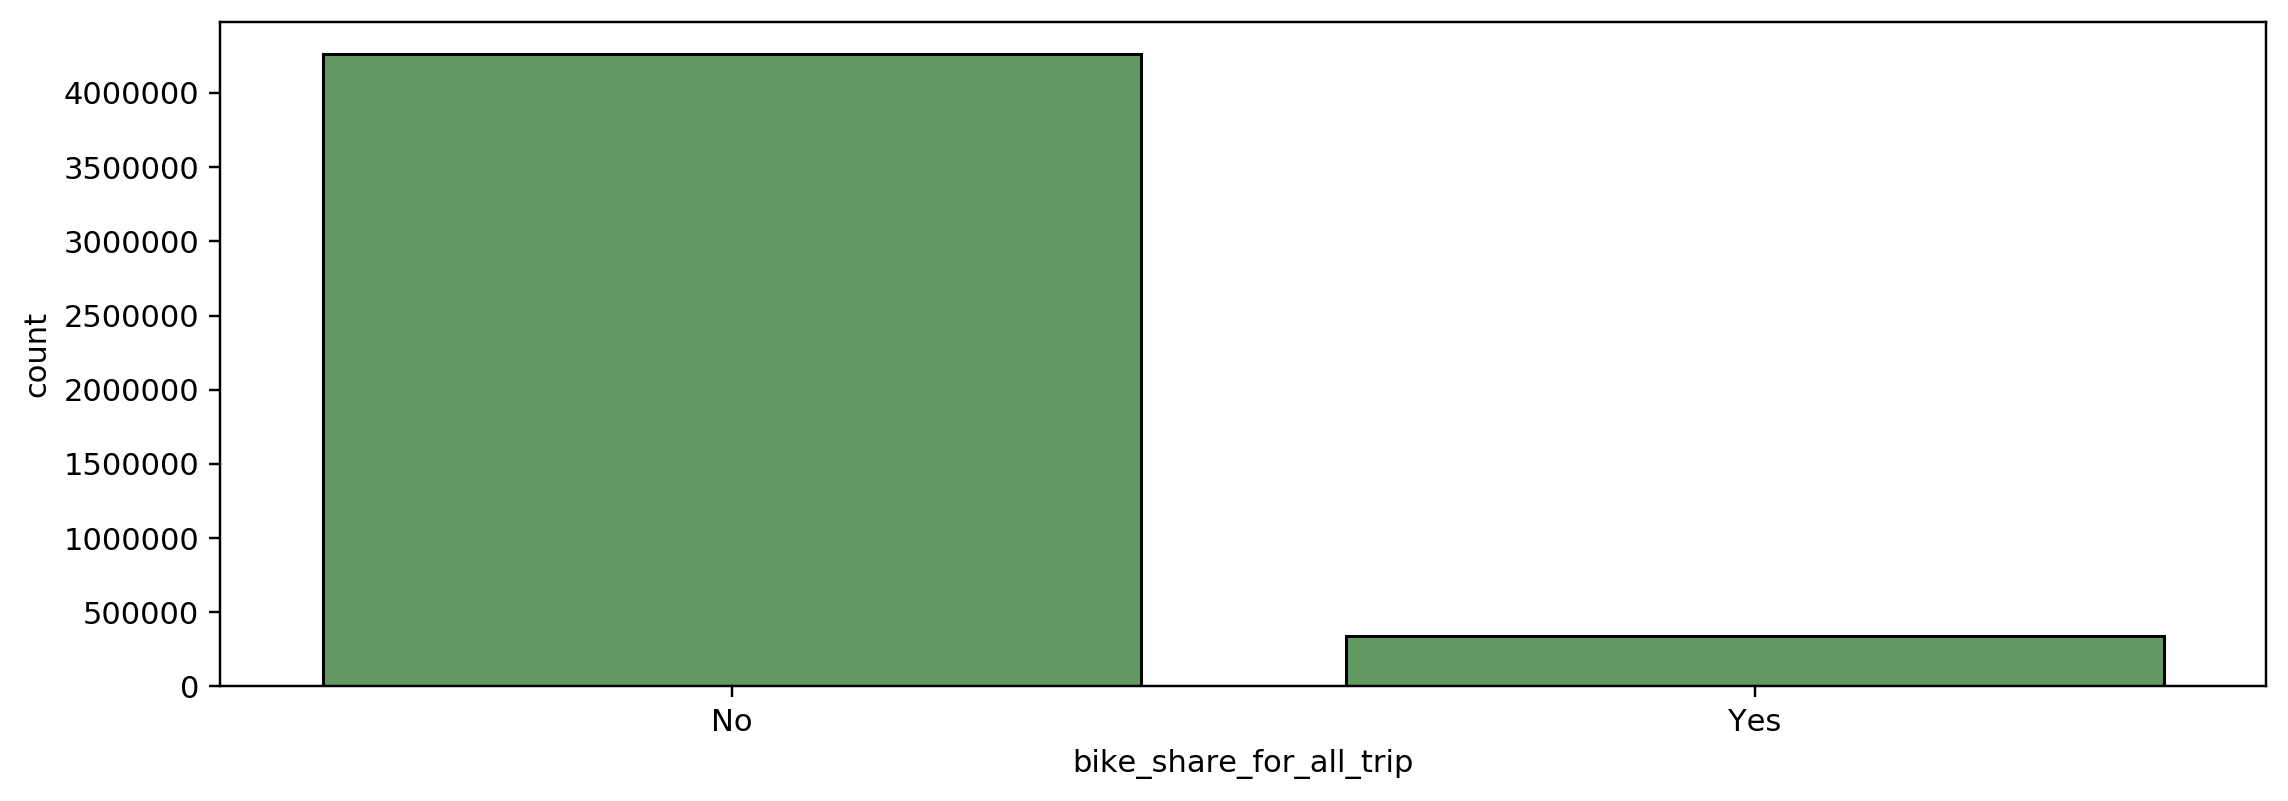

In [104]:
fig, ax = plt.subplots(figsize = (12,4), dpi = 110)
sns.countplot(data= Final_df,x='bike_share_for_all_trip',color= sns.color_palette()[2],edgecolor = "black");

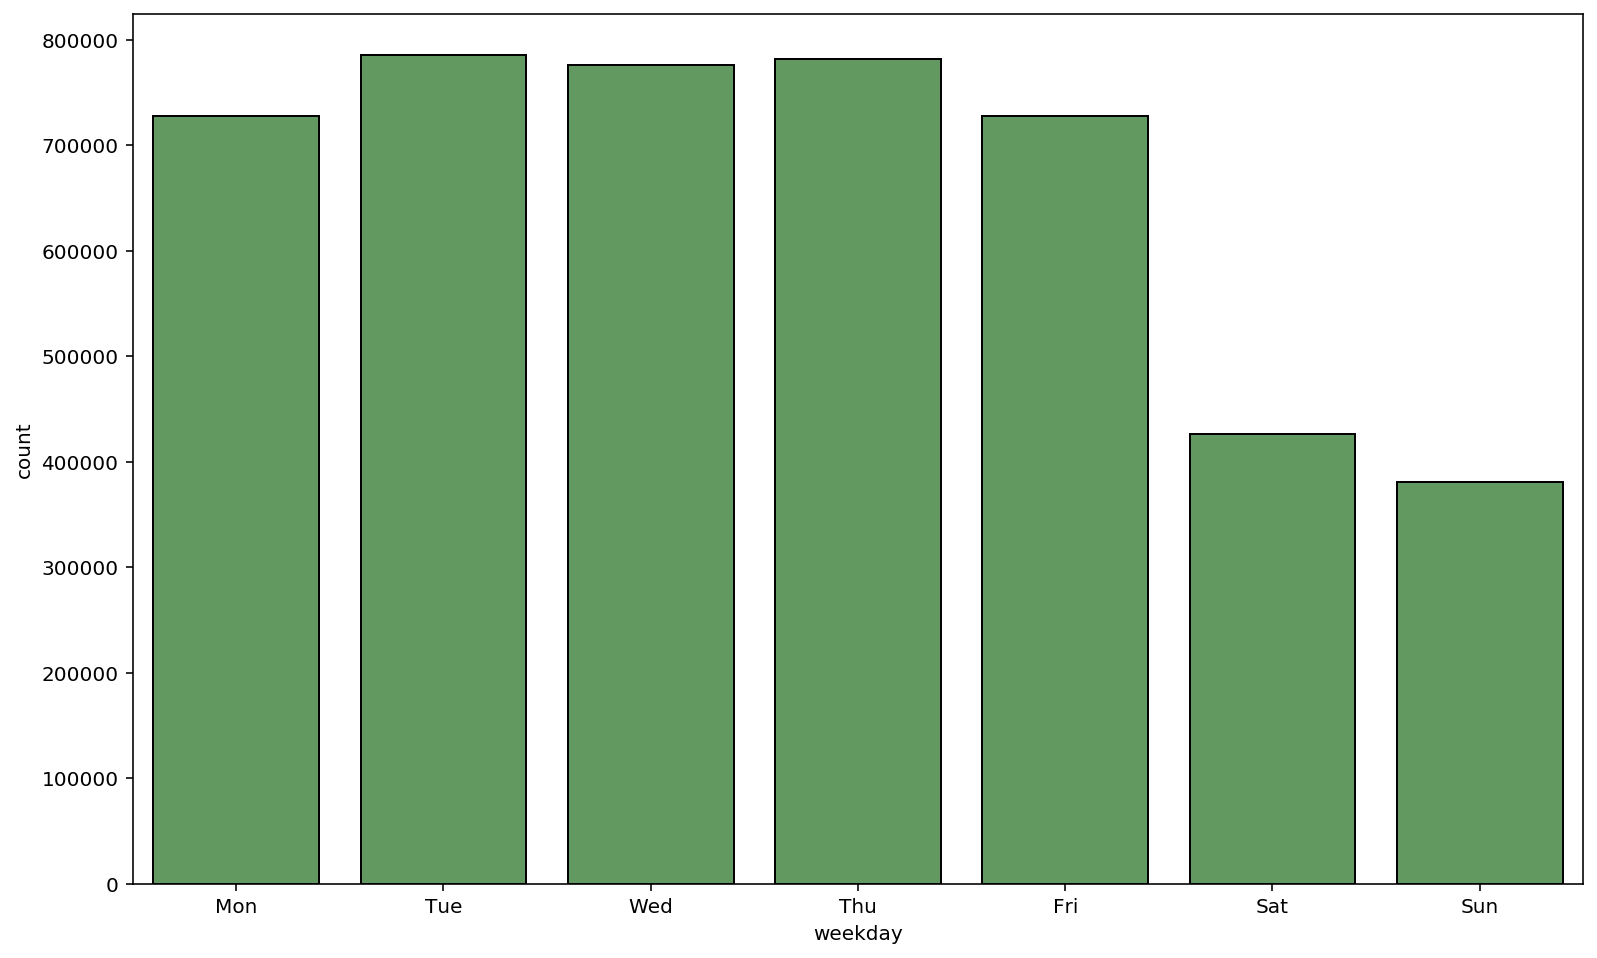

In [45]:
gen_order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
sns.countplot(data= Final_df,x='weekday',color= sns.color_palette()[2],order=gen_order,edgecolor = "black");

The above plot shows us which days of the week  has maximum numbers of bike sharing. From the above plot it is clear that during the weekdays the booking numbers are higher and weekends has lower numbers of booking. This may due to the fact the people are using bikes for there office commute.

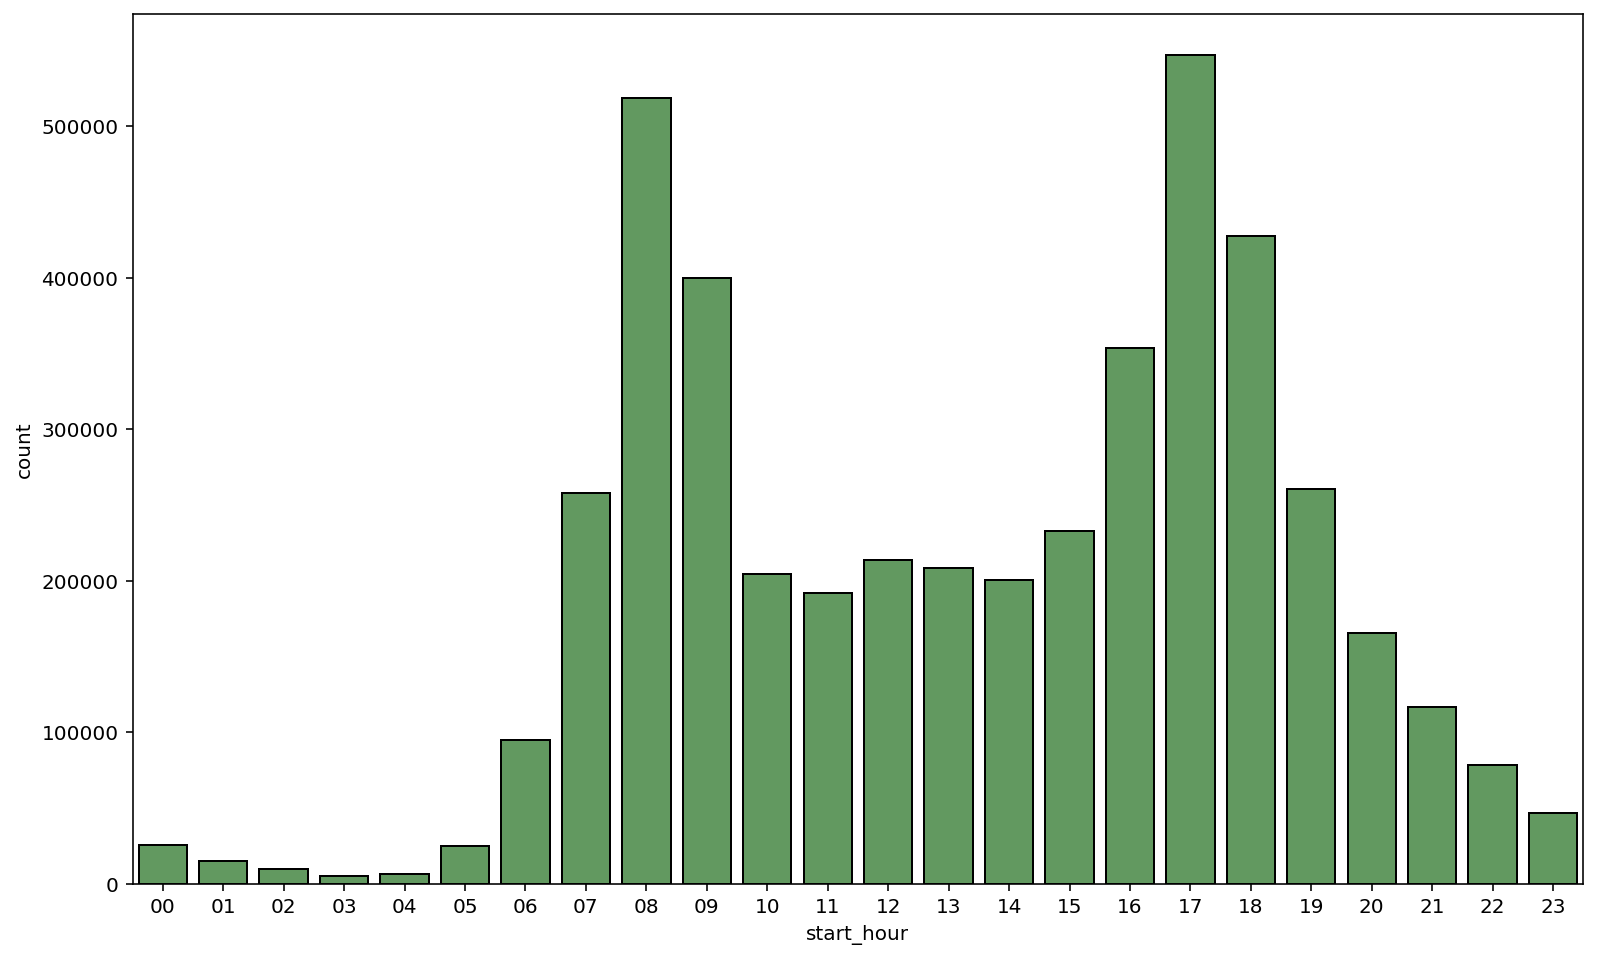

In [46]:
sns.countplot(data= Final_df,x='start_hour',color= sns.color_palette()[2],edgecolor = "black");

The above plot shows the distriubtion of the bike sharing during the 24-hrs of time throughout the time duration of analysis.
From the graph it is clear that during the office commute time the bike sharing has maximum counts.

The minimum duration for which the bike is booked is:    1.0 min
The maximum duration for which the bike is booked is:    23.99 hrs


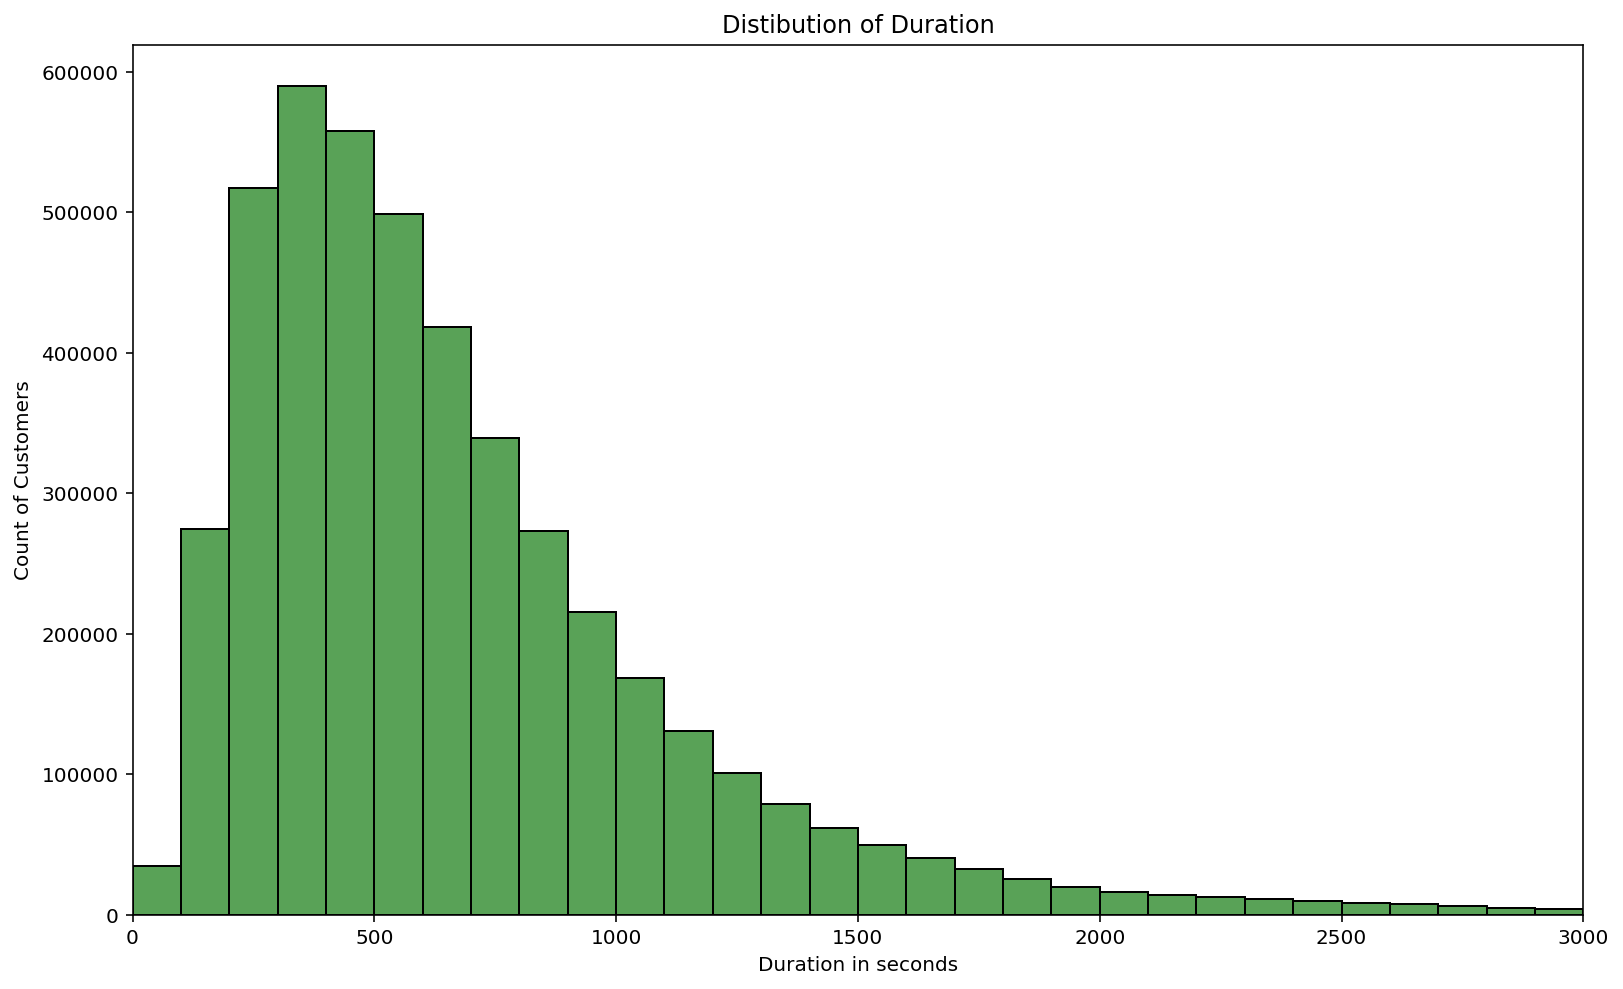

In [136]:
# Calculating 
Min_duration = Final_df['duration_sec'].min()/60
Max_duration= Final_df['duration_sec'].max()/(60*60)
print("The minimum duration for which the bike is booked is:    {} min".format(Min_duration))
print("The maximum duration for which the bike is booked is:    {:.2f} hrs".format(Max_duration))
bins=np.arange(0,Final_df['duration_sec'].max()+5,100)
plt.hist(data=Final_df,x='duration_sec',bins=bins,color= sns.color_palette()[2],edgecolor = "black");
plt.xlabel('Duration in seconds')
plt.ylabel('Count of Customers')
plt.title('Distibution of Duration')
plt.xlim(0,3000);

From the above distribution we found out the minimum duration for which the bike is booked is *1.0 min* and maximum duration for which the bike is booked is 24 hrs. Also, the booking duration for 300-500 seconds  has the maximum counts.

## Bivariate Exploration

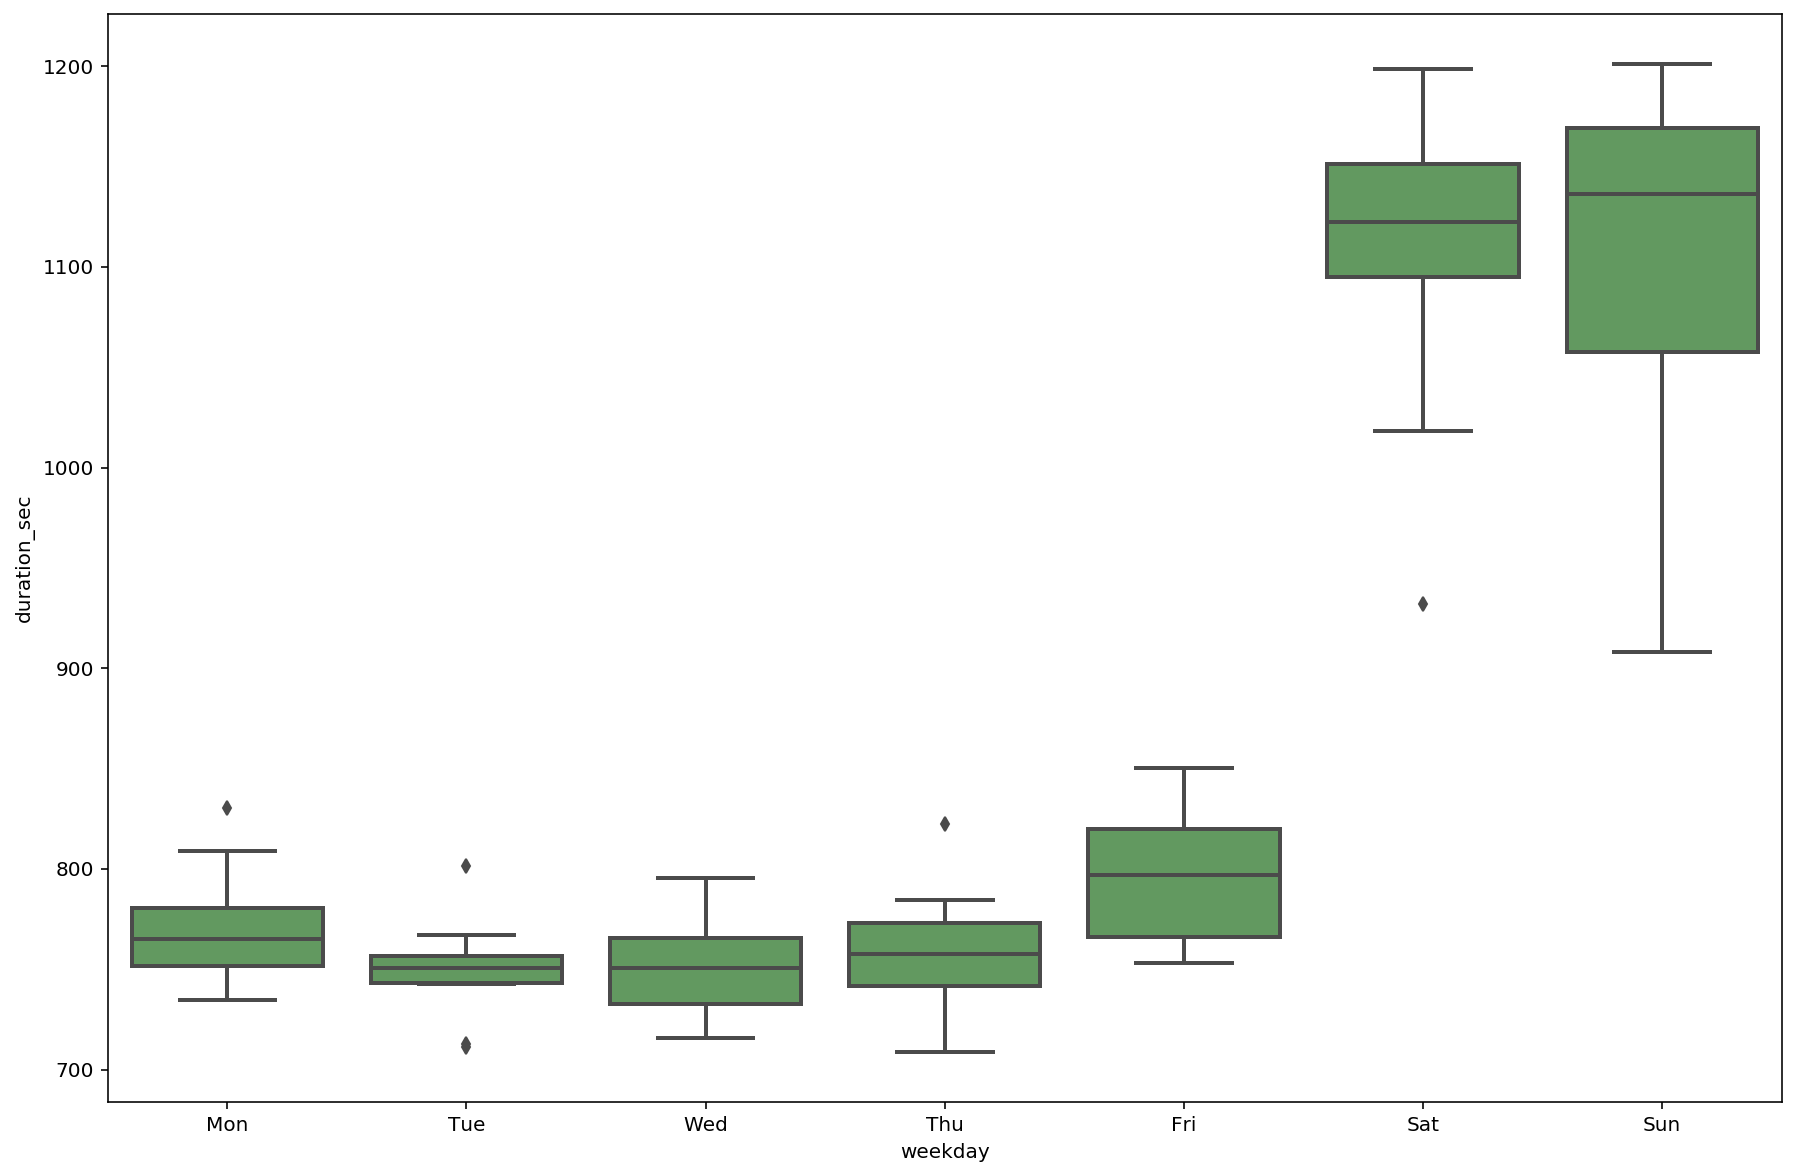

In [118]:
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(x = "weekday", y = "duration_sec",order=gen_order,color= sns.color_palette()[2],
             data = Final_df.groupby(["weekday", "start_month"], 
                                                                   as_index = False).mean());

The above box plot shows the distribution of the duration of the time for which the bike is booked and from the plot it is very interesting to know that however there are less numbers of booking during weekends but the duration of the time for which the bikes are book are maximum during the weekends.

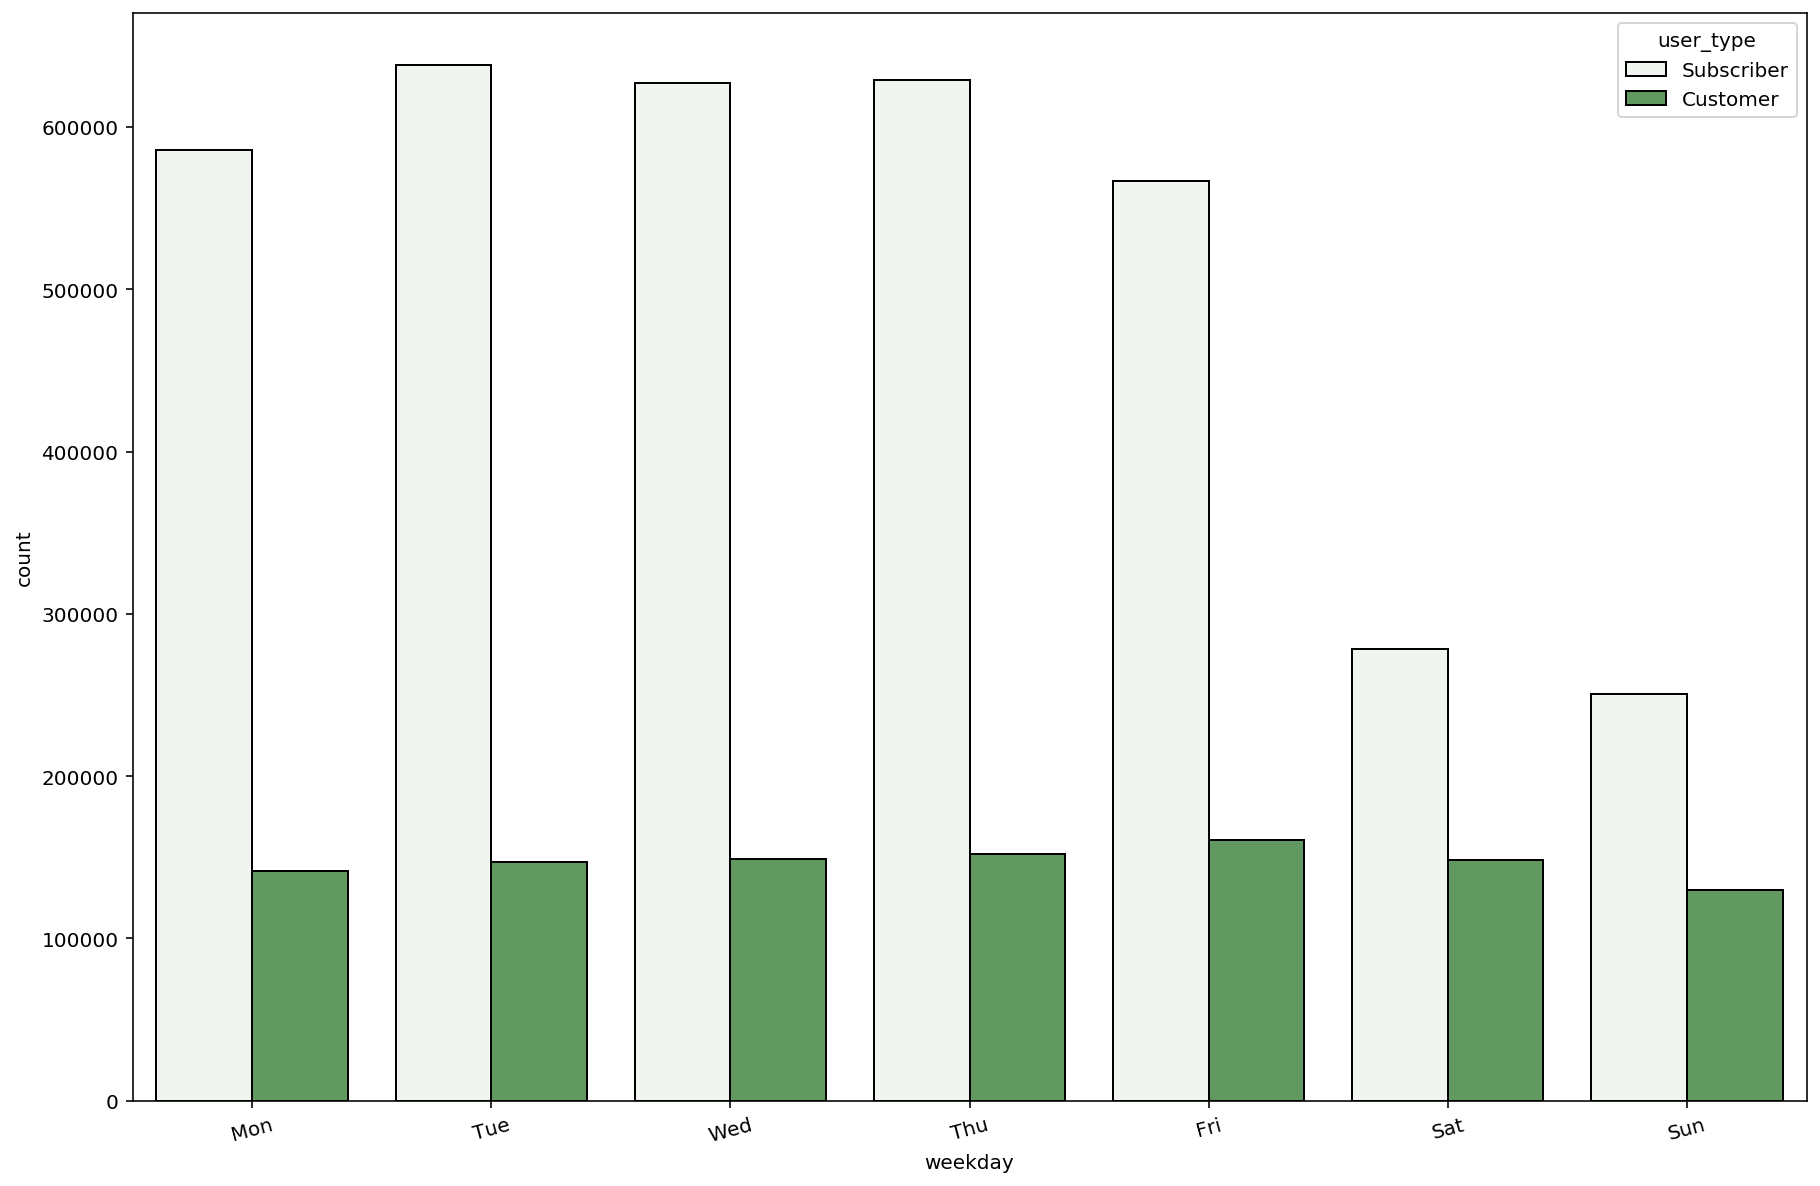

In [116]:
# for cluster bar chart we need to just add one more parameter
fig, ax = plt.subplots(figsize = (15,10))
sns.countplot(data=Final_df,x='weekday',hue='user_type',order=gen_order,edgecolor = "black",color= sns.color_palette()[2])
plt.xticks(rotation=15);

The above plot shows the distribution of the customers and subscribers during days of the week. We can see some variation in the number of counts in bike sharing for Subscribers. However, the variance in the counts for the customers are remaining constant.

## Multivariate Exploration

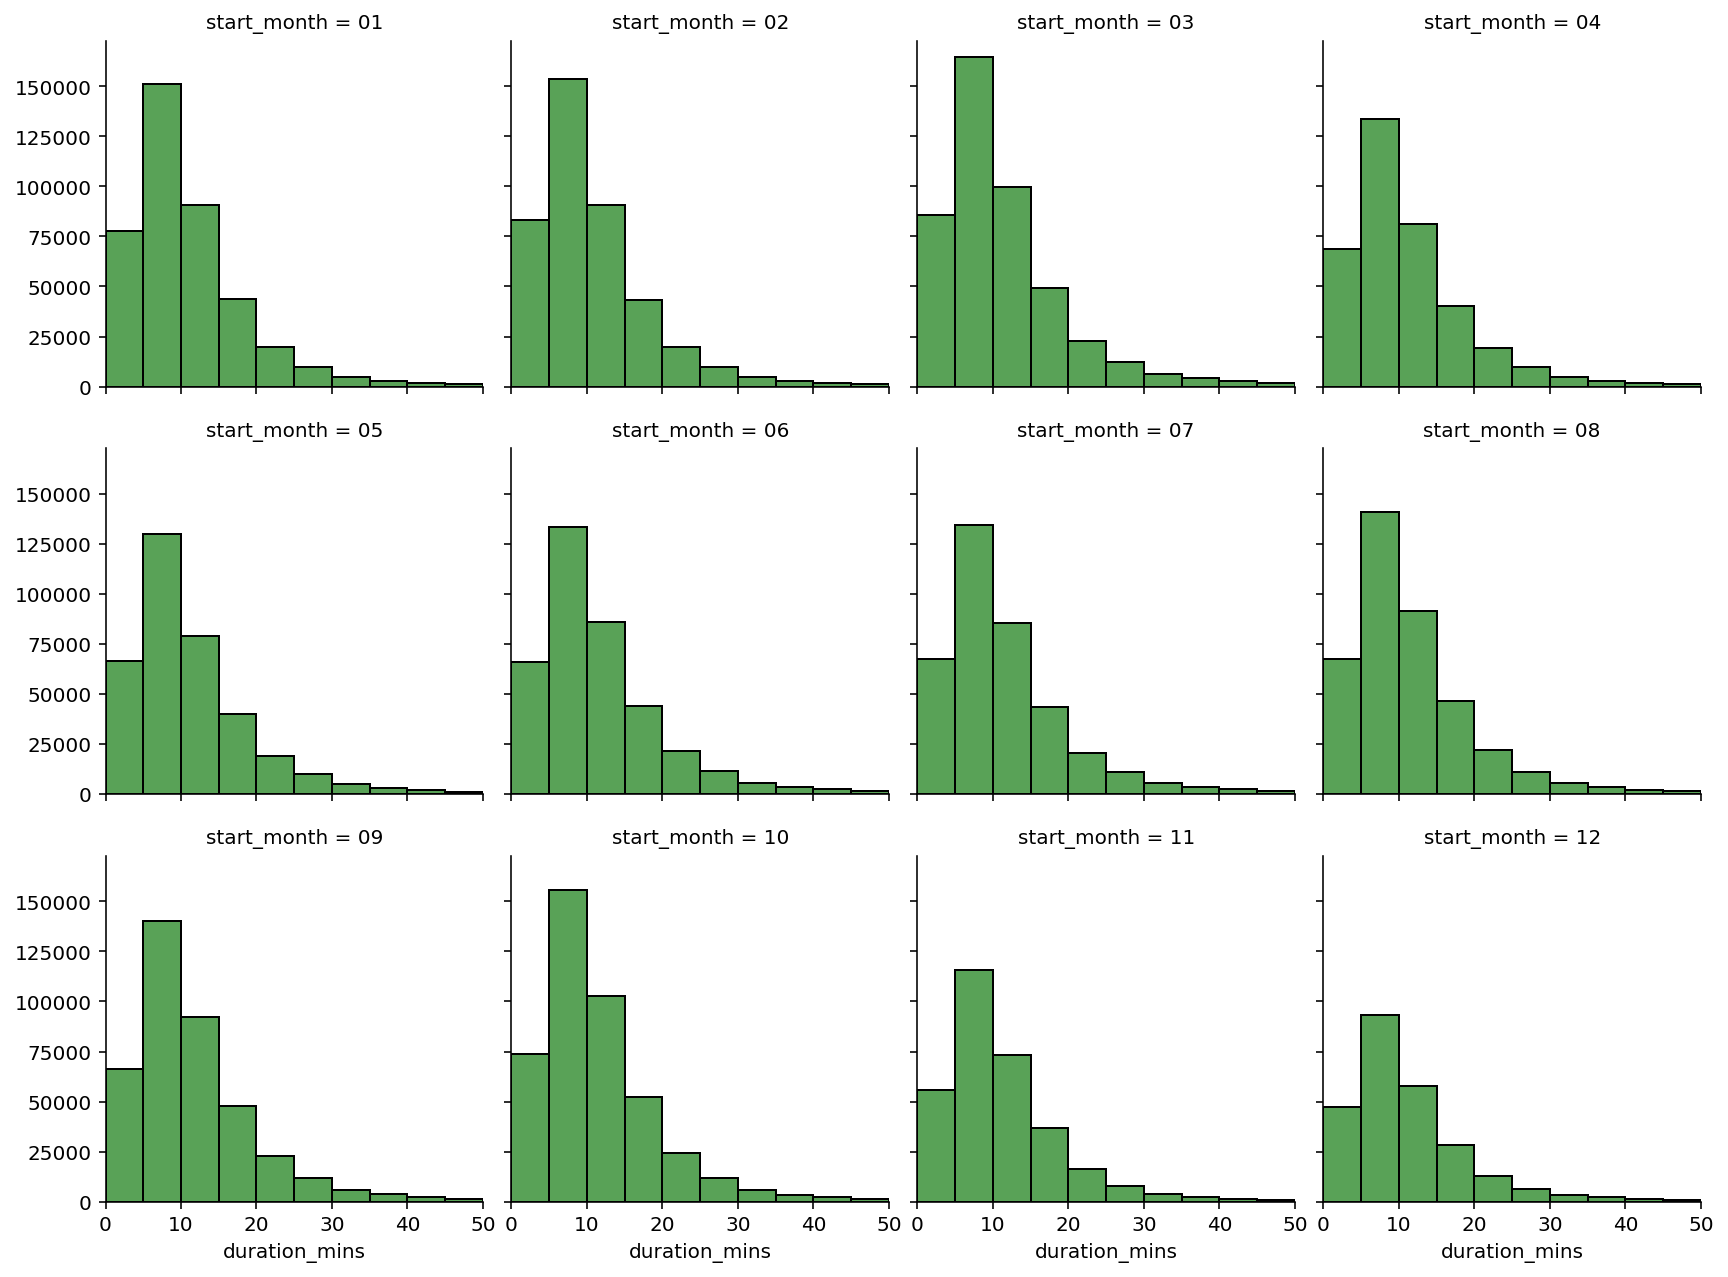

In [126]:
bins=np.arange(0,Final_df['duration_sec'].max()+5,5)
g= sns.FacetGrid(data=Final_df,col='start_month',col_wrap= 4);
g.map(plt.hist,'duration_mins',bins=bins,edgecolor = "black",color= sns.color_palette()[2])# What kind of plot we want to plot
plt.xlim(0,50);

The above graphs shows the distribution of booking durations of bike in minutes with respect to each month of the year.

### What is the structure of your dataset?

> The dataset has  5275711 rows and 15 columns and 7512 duplicate rows.


### What is/are the main feature(s) of interest in your dataset?

> Duration_second, start_time are the important feautre of the dataset, which shows for how much time the bike is shared. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Duration of time, longitude and latitude of the bike station are some of the interesting variables.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The minimum duration for which the bike is booked is 1.0 min and the maximum duration for which the bike is booked is ~24hrs.
Also, the booking duration for 300-500 seconds has the maximum counts. Yes, the data type for the dates were object and it was changed to datetime.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> New features of were created from the start time which helped us to determine the trends during 24 hrs of day, weekdays and months. 

## Summary and Conclusion

> - The dataset has 5275711 rows and 15 columns and 7512 duplicate rows.
> - The minimum duration for which the bike is booked is 1.0 min and the maximum duration is ~24hrs.The booking duration for 300-500 seconds has the maximum counts.
> - The number of subscriber to the service are more than customers
> - March and October has the highest number of bike sharing
> - During weekdays the booking numbers are higher and weekends has lower numbers of booking.
> - The office commute time 8am-9am and 4pm - 5pm the bike sharing has maximum counts.
> - There are less numbers of booking during weekends but the duration of the time for which the bikes are book are maximum during the weekends. 
> - There is variation in the number of counts in bike sharing for subscribers. However, for customers are count is somewhat constant.